In [1]:
# target variable will be imdb scores because of their 1-10 scale

import pandas as pd 
from sklearn.linear_model import LinearRegression 

df = pd.read_csv("data/processed/episode_full_dataset.csv")

df.head()


,Season,Episode,fear,anger,anticipation,trust,surprise,positive,negative,sadness,...,Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis
0,season-01,e01,0.088028,0.059859,0.090669,0.142606,0.049296,0.186620,0.159331,0.084507,...,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night..."
1,season-01,e02,0.099062,0.066736,0.081335,0.133472,0.047967,0.192909,0.172054,0.069864,...,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King..."
2,season-01,e03,0.095676,0.068997,0.087397,0.131555,0.046918,0.166513,0.179393,0.078197,...,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...
3,season-01,e04,0.100559,0.057462,0.094174,0.138069,0.045491,0.189146,0.160415,0.077414,...,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop..."
4,season-01,e05,0.102941,0.069853,0.082353,0.150735,0.041912,0.172059,0.175000,0.074265,...,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered..."


In [2]:
# choosing target variable 

target_col = "IMDb Rating"  # target variable for regression

y = df[target_col]
y.head()


0    8.9
1    8.6
2    8.5
3    8.6
4    9.0
Name: IMDb Rating, dtype: float64

In [3]:
emotion_cols = [
    "fear",
    "anger",
    "anticipation",
    "trust",
    "surprise",
    "positive",
    "negative",
    "sadness",
    "disgust",
    "joy"
]

X = df[emotion_cols]
X.head()


,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy
0,0.088028,0.059859,0.090669,0.142606,0.049296,0.186620,0.159331,0.084507,0.066901,0.072183
1,0.099062,0.066736,0.081335,0.133472,0.047967,0.192909,0.172054,0.069864,0.058394,0.078206
2,0.095676,0.068997,0.087397,0.131555,0.046918,0.166513,0.179393,0.078197,0.067157,0.078197
3,0.100559,0.057462,0.094174,0.138069,0.045491,0.189146,0.160415,0.077414,0.059058,0.078212
4,0.102941,0.069853,0.082353,0.150735,0.041912,0.172059,0.175000,0.074265,0.060294,0.070588


In [4]:
# train regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
#inspect coefficients
coeffs = pd.DataFrame({
    "emotion": emotion_cols,
    "coefficient": model.coef_
}).sort_values("coefficient", ascending=False)

coeffs

# table shows which emotions raise or lower the predicted imdb score

,emotion,coefficient
9,joy,12.684917
8,disgust,10.424078
0,fear,7.018809
1,anger,6.469930
3,trust,6.138531
2,anticipation,-0.930945
7,sadness,-5.836562
5,positive,-10.240015
4,surprise,-11.398536
6,negative,-14.330206


Matplotlib is building the font cache; this may take a moment.


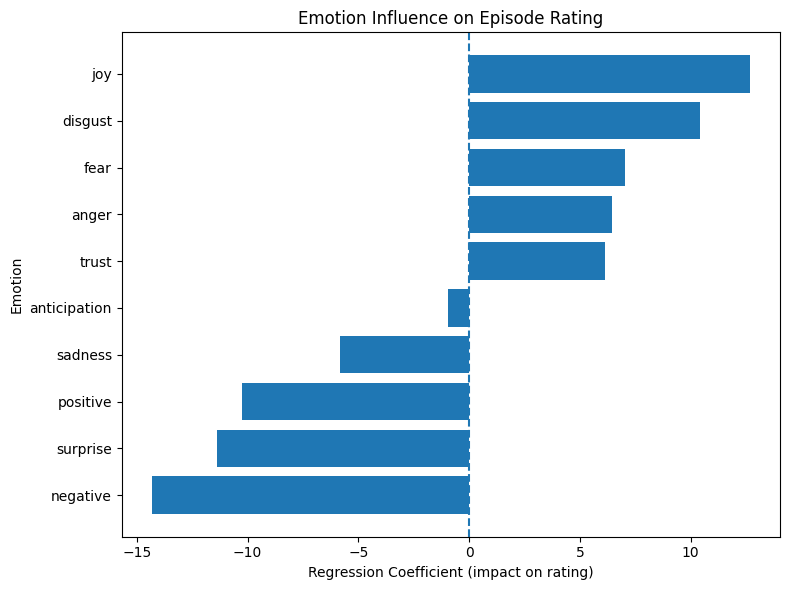

In [ ]:
#create visualization
#mathplotlib is local is doesnt look that good here 
import pandas as pd
import matplotlib.pyplot as plt

# use dataframe to organize coeffs

coef_df = pd.DataFrame({
    "emotion": X.columns,
    "coefficient": model.coef_
})

# original table for reference coef_df

# make horizontal bar chart

coef_df = coef_df.sort_values("coefficient", ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(coef_df["emotion"], coef_df["coefficient"])
plt.axvline(0, linestyle="--")  # vertical line at 0 for reference
plt.title("Emotion Influence on Episode Rating")
plt.xlabel("Regression Coefficient (impact on rating)")
plt.ylabel("Emotion")
plt.tight_layout()
plt.show()


In [ ]:
# the coefficients are not intuitive to interpret because the emotion scores are small decimal values and proportions

# scaling coeffs from raw
emotion_features = X.columns.tolist()

coef_df = pd.DataFrame({
    "emotion": emotion_features,
    "coefficient_raw": model.coef_
})

#add columns to reference table 
coef_df["effect_per_1pct"] = coef_df["coefficient_raw"] * 0.01   # +1% emotion
coef_df["effect_per_10pct"] = coef_df["coefficient_raw"] * 0.10  # +10% emotion


coef_df = coef_df.sort_values("effect_per_10pct", ascending=False)
coef_df



,emotion,coefficient_raw,effect_per_1pct,effect_per_10pct
9,joy,12.684917,0.126849,1.268492
8,disgust,10.424078,0.104241,1.042408
0,fear,7.018809,0.070188,0.701881
1,anger,6.469930,0.064699,0.646993
3,trust,6.138531,0.061385,0.613853
2,anticipation,-0.930945,-0.009309,-0.093095
7,sadness,-5.836562,-0.058366,-0.583656
5,positive,-10.240015,-0.102400,-1.024002
4,surprise,-11.398536,-0.113985,-1.139854
6,negative,-14.330206,-0.143302,-1.433021


In [11]:
# compute model R^2 and accuracy

from sklearn.metrics import r2_score, mean_squared_error

#ratings
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R²:", r2)
print("Mean Squared Error:", mse)


R²: 0.12722048717740742
Mean Squared Error: 0.3947566243369139


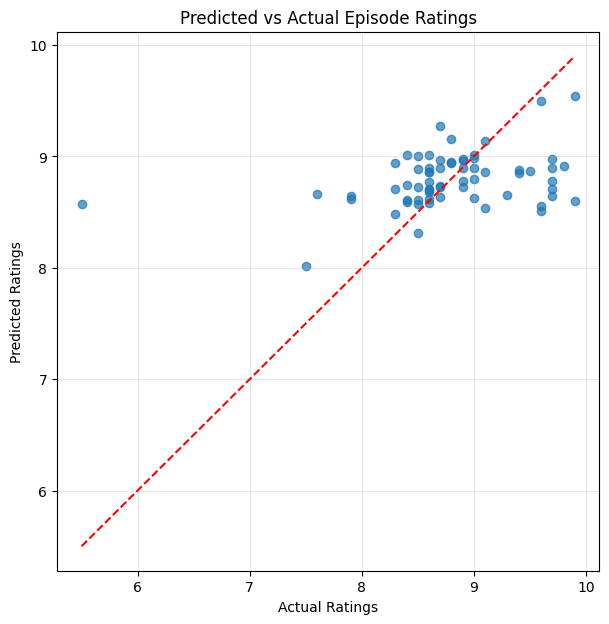

In [12]:
# predicted vs actual ratings plot

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal reference line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs Actual Episode Ratings")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# regression equation 
intercept = model.intercept_

print("Rating = {:.3f}".format(intercept))
for emotion, coef in zip(emotion_cols, model.coef_):
    print(f"       + ({coef:.3f} × {emotion})")


Rating = 10.622
       + (7.019 × fear)
       + (6.470 × anger)
       + (-0.931 × anticipation)
       + (6.139 × trust)
       + (-11.399 × surprise)
       + (-10.240 × positive)
       + (-14.330 × negative)
       + (-5.837 × sadness)
       + (10.424 × disgust)
       + (12.685 × joy)
